# Exploratory Data Analysis

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
vgresult = pd.read_csv('cleaned-Video-Game-dataset.csv')
vgresult.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
vgresult[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].describe().round(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.00,16287.00,16287.00,16287.00,16287.00
mean,0.27,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.57
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.48
max,41.49,29.02,10.22,10.57,82.74


Platform Vs Global Sales

In [6]:
platform_sales = vgresult.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales.head()

,Platform,Global_Sales
0,2600,86.57
1,3DO,0.10
2,3DS,246.27
3,DC,15.97
4,DS,818.62


In [7]:
# Sort the platforms by total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

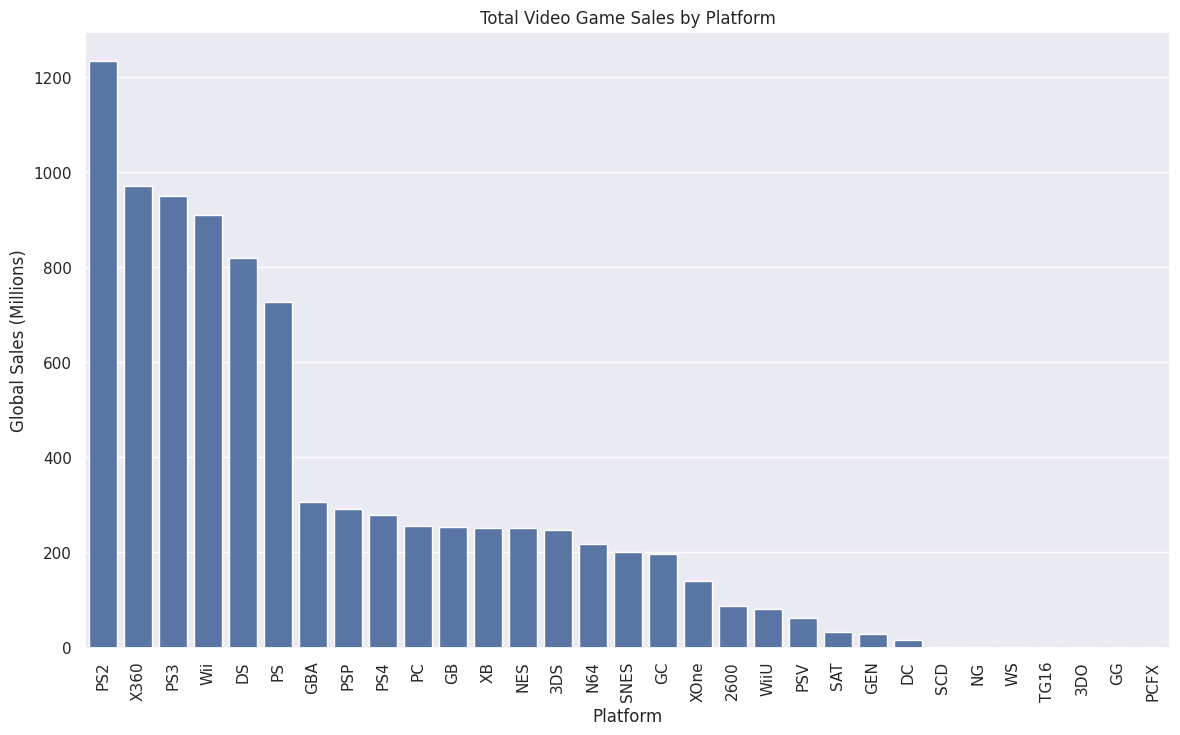

In [8]:
# Plotting the total sales per platform
plt.figure(figsize=(14, 8))  # Adjusting the figure size for better visibility
sb.barplot(data=platform_sales, x='Platform', y='Global_Sales')
plt.xticks(rotation=90)  # Rotate the platform names for better readability
plt.title('Total Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.show()

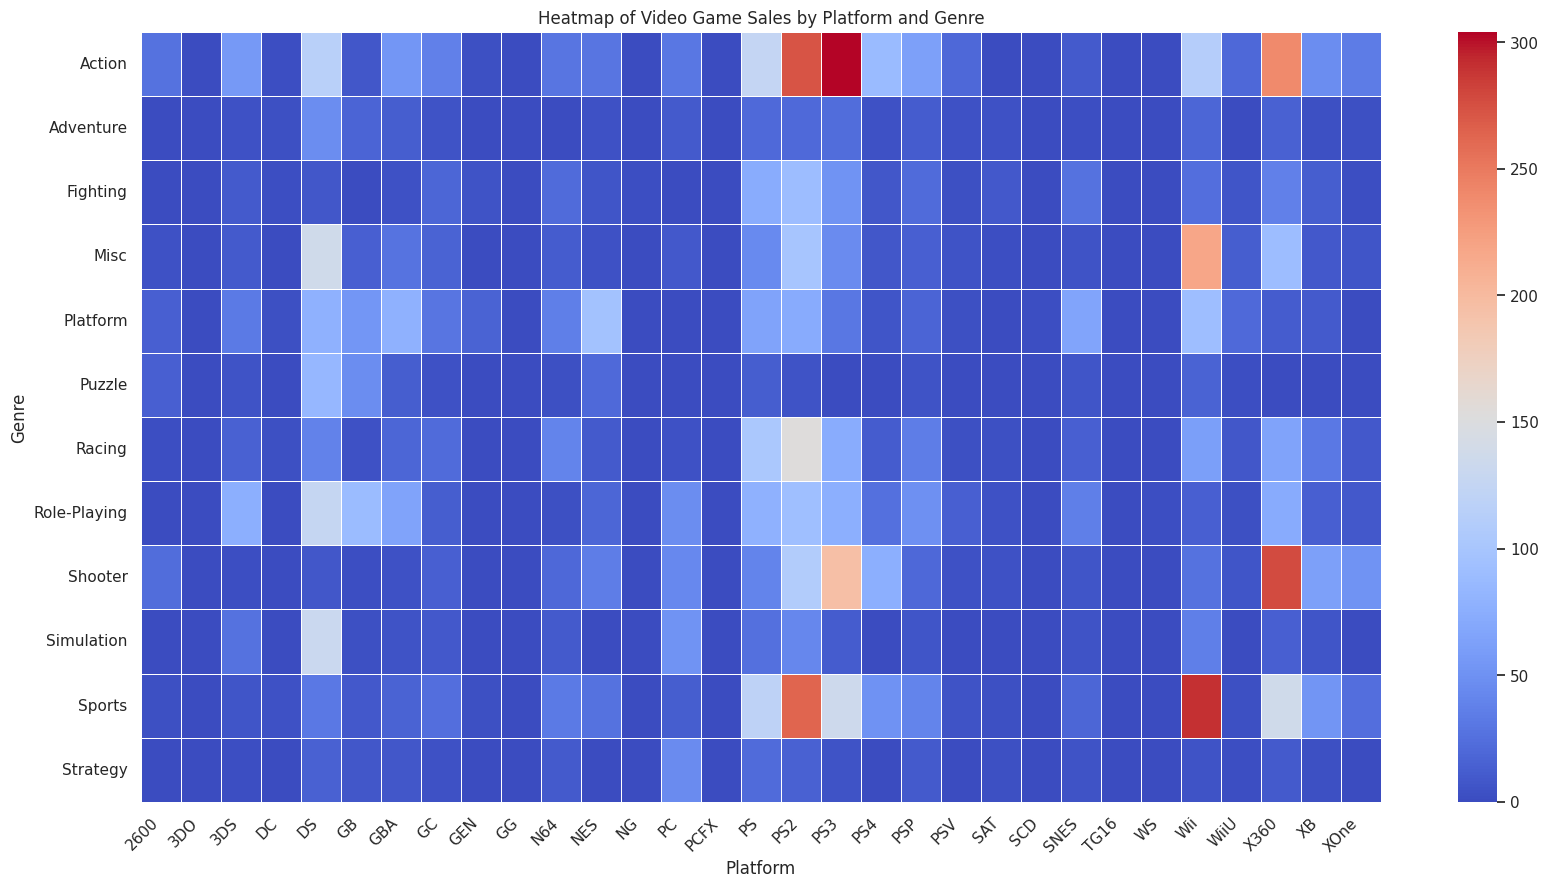

In [10]:
# Create a pivot table to aggregate the sum of sales for each platform with different genres
heatmap_data = vgresult.pivot_table(values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 10))
sb.heatmap(heatmap_data, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Video Game Sales by Platform and Genre')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

Genre Vs Sales

In [11]:
genre_sale = pd.DataFrame(vgresult[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]])
genre_sale.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.49,29.02,3.77,8.46
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.85,12.88,3.79,3.31
3,Sports,15.75,11.01,3.28,2.96
4,Role-Playing,11.27,8.89,10.22,1.00


Number of Genre : 12
Genre
Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64


,Total_Count
Genre,
Action,3250
Sports,2304
Misc,1686
Role-Playing,1468
Shooter,1282


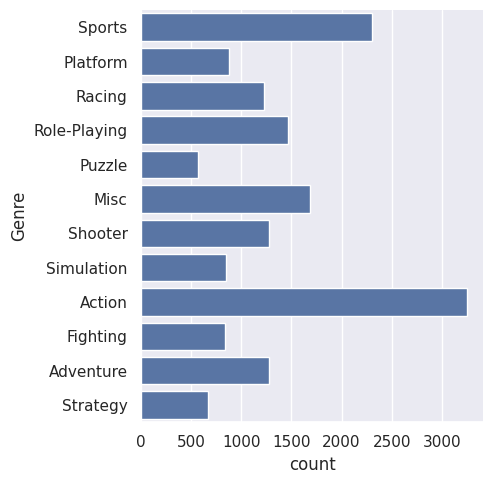

In [12]:
# Genre in the Dataset
print("Number of Genre :", len(genre_sale["Genre"].unique()))

# Total count in each genre
print(genre_sale["Genre"].value_counts())
sb.catplot(y = "Genre", data = genre_sale, kind = "count")
total_genre_count = pd.DataFrame(genre_sale["Genre"].value_counts())
total_genre_count = total_genre_count.rename(columns={"Genre": "Genre","count": "Total_Count"})
total_genre_count.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.64,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51


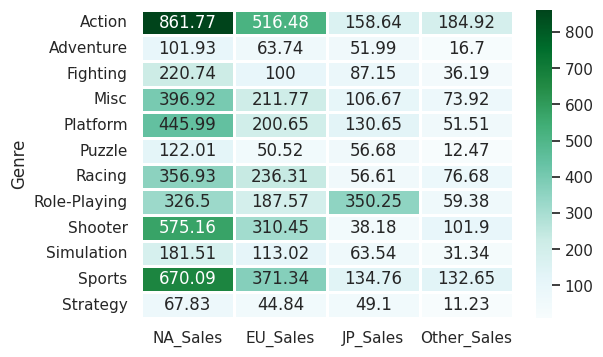

In [13]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(genre_sale.groupby(["Genre"]).sum(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 12},
           cmap = "BuGn")

#total region sale in each genre 
total_genre_region_sale = pd.DataFrame(genre_sale.groupby(["Genre"]).sum())
total_genre_region_sale.head()

In [14]:
total_genre_sale = pd.DataFrame(total_genre_region_sale.sum(axis=1), columns=["Total_Sales"])
total_genre_sale.head()

,Total_Sales
Genre,
Action,1721.81
Adventure,234.36
Fighting,444.08
Misc,789.28
Platform,828.80


In [35]:
total_count_total_sale = pd.concat([total_genre_count, total_genre_sale], axis = 1).reindex(total_genre_sale.index)
total_count_total_sale.reset_index(inplace=True)
total_count_total_sale.rename(columns={'index': 'Genre'}, inplace=True)
total_count_total_sale.to_csv('total-count-total-sale.csv')
total_count_total_sale.head(n=12)

,Genre,Total_Count,Total_Sales
0,Action,3250,1721.81
1,Adventure,1274,234.36
2,Fighting,836,444.08
3,Misc,1686,789.28
4,Platform,875,828.80
5,Puzzle,570,241.68
6,Racing,1225,726.53
7,Role-Playing,1468,923.70
8,Shooter,1282,1025.69
9,Simulation,847,389.41


Publisher Vs Global Sales

In [16]:
total_platforms = vgresult['Platform'].nunique()
print("Total number of platforms:", total_platforms)


Total number of platforms: 31


In [17]:
global_publisher_sales = vgresult.groupby('Publisher')['Global_Sales'].sum()
global_highest_publisher = global_publisher_sales.idxmax()
global_highest_publisher_sales = global_publisher_sales.max()

In [18]:
print(f"Highest Publisher(global): '{global_highest_publisher}'." )
print(f"Total Sales(global): '{global_highest_publisher_sales}'." )

Highest Publisher(global): 'Nintendo'.
Total Sales(global): '1784.43'.


In [19]:
top_50_global_publishers = global_publisher_sales.nlargest(50)
print("Top 50 Publishers(global):")
print(top_50_global_publishers)

Top 50 Publishers(global):
Publisher
Nintendo                                  1784.43
Electronic Arts                           1093.39
Activision                                 721.41
Sony Computer Entertainment                607.28
Ubisoft                                    473.25
Take-Two Interactive                       399.30
THQ                                        340.44
Konami Digital Entertainment               278.56
Sega                                       270.66
Namco Bandai Games                         253.65
Microsoft Game Studios                     245.79
Capcom                                     199.95
Atari                                      146.77
Square Enix                                144.73
Warner Bros. Interactive Entertainment     142.34
Disney Interactive Studios                 118.76
Eidos Interactive                           96.75
LucasArts                                   84.95
Bethesda Softworks                          81.53
Midway Games 

In [20]:
bottom_50_global_publishers = global_publisher_sales.nsmallest(50)
print("Bottom 50 publishers by global sales:")
print(bottom_50_global_publishers)

Bottom 50 publishers by global sales:
Publisher
Ascaron Entertainment         0.01
Boost On                      0.01
Commseed                      0.01
EON Digital Entertainment     0.01
Epic Games                    0.01
Genterprise                   0.01
Interchannel-Holon            0.01
Interworks Unlimited, Inc.    0.01
Inti Creates                  0.01
Media Entertainment           0.01
Michaelsoft                   0.01
Naxat Soft                    0.01
New World Computing           0.01
Ongakukan                     0.01
Otomate                       0.01
Paradox Development           0.01
Piacci                        0.01
Rain Games                    0.01
Stainless Games               0.01
Takuyo                        0.01
UIG Entertainment             0.01
Codemasters Online            0.02
GOA                           0.02
Gaga                          0.02
Giga                          0.02
Giza10                        0.02
Graphsim Entertainment        0.02
Imagewo

In [21]:
NA_publisher_sales = vgresult.groupby('Publisher')['NA_Sales'].sum()
NA_highest_publisher = NA_publisher_sales.idxmax()
NA_highest_publisher_sales = NA_publisher_sales.max()
print(f"Highest Publisher(NA): '{NA_highest_publisher}'." )
print(f"Total sales(NA): '{NA_highest_publisher_sales}'." )

Highest Publisher(NA): 'Nintendo'.
Total sales(NA): '815.75'.


In [22]:
JP_publisher_sales = vgresult.groupby('Publisher')['JP_Sales'].sum()
JP_highest_publisher = JP_publisher_sales.idxmax()
JP_highest_publisher_sales = JP_publisher_sales.max()
print(f"Highest Publisher(JP): '{JP_highest_publisher}'." )
print(f"Total sales(JP): '{JP_highest_publisher_sales}'." )

Highest Publisher(JP): 'Nintendo'.
Total sales(JP): '454.99'.


In [23]:
# Calculate total revenue by publisher and year
yearly_global_publisher_sales = vgresult.groupby(['Publisher', 'Year'])['Global_Sales'].sum()

# Get the top 10 publishers based on total revenue
top_50_global_publishers = vgresult.groupby('Publisher')['Global_Sales'].sum().nlargest(50).index

# Filter data for top 10 publishers
yearly_top_50_data = yearly_global_publisher_sales.loc[top_50_global_publishers]


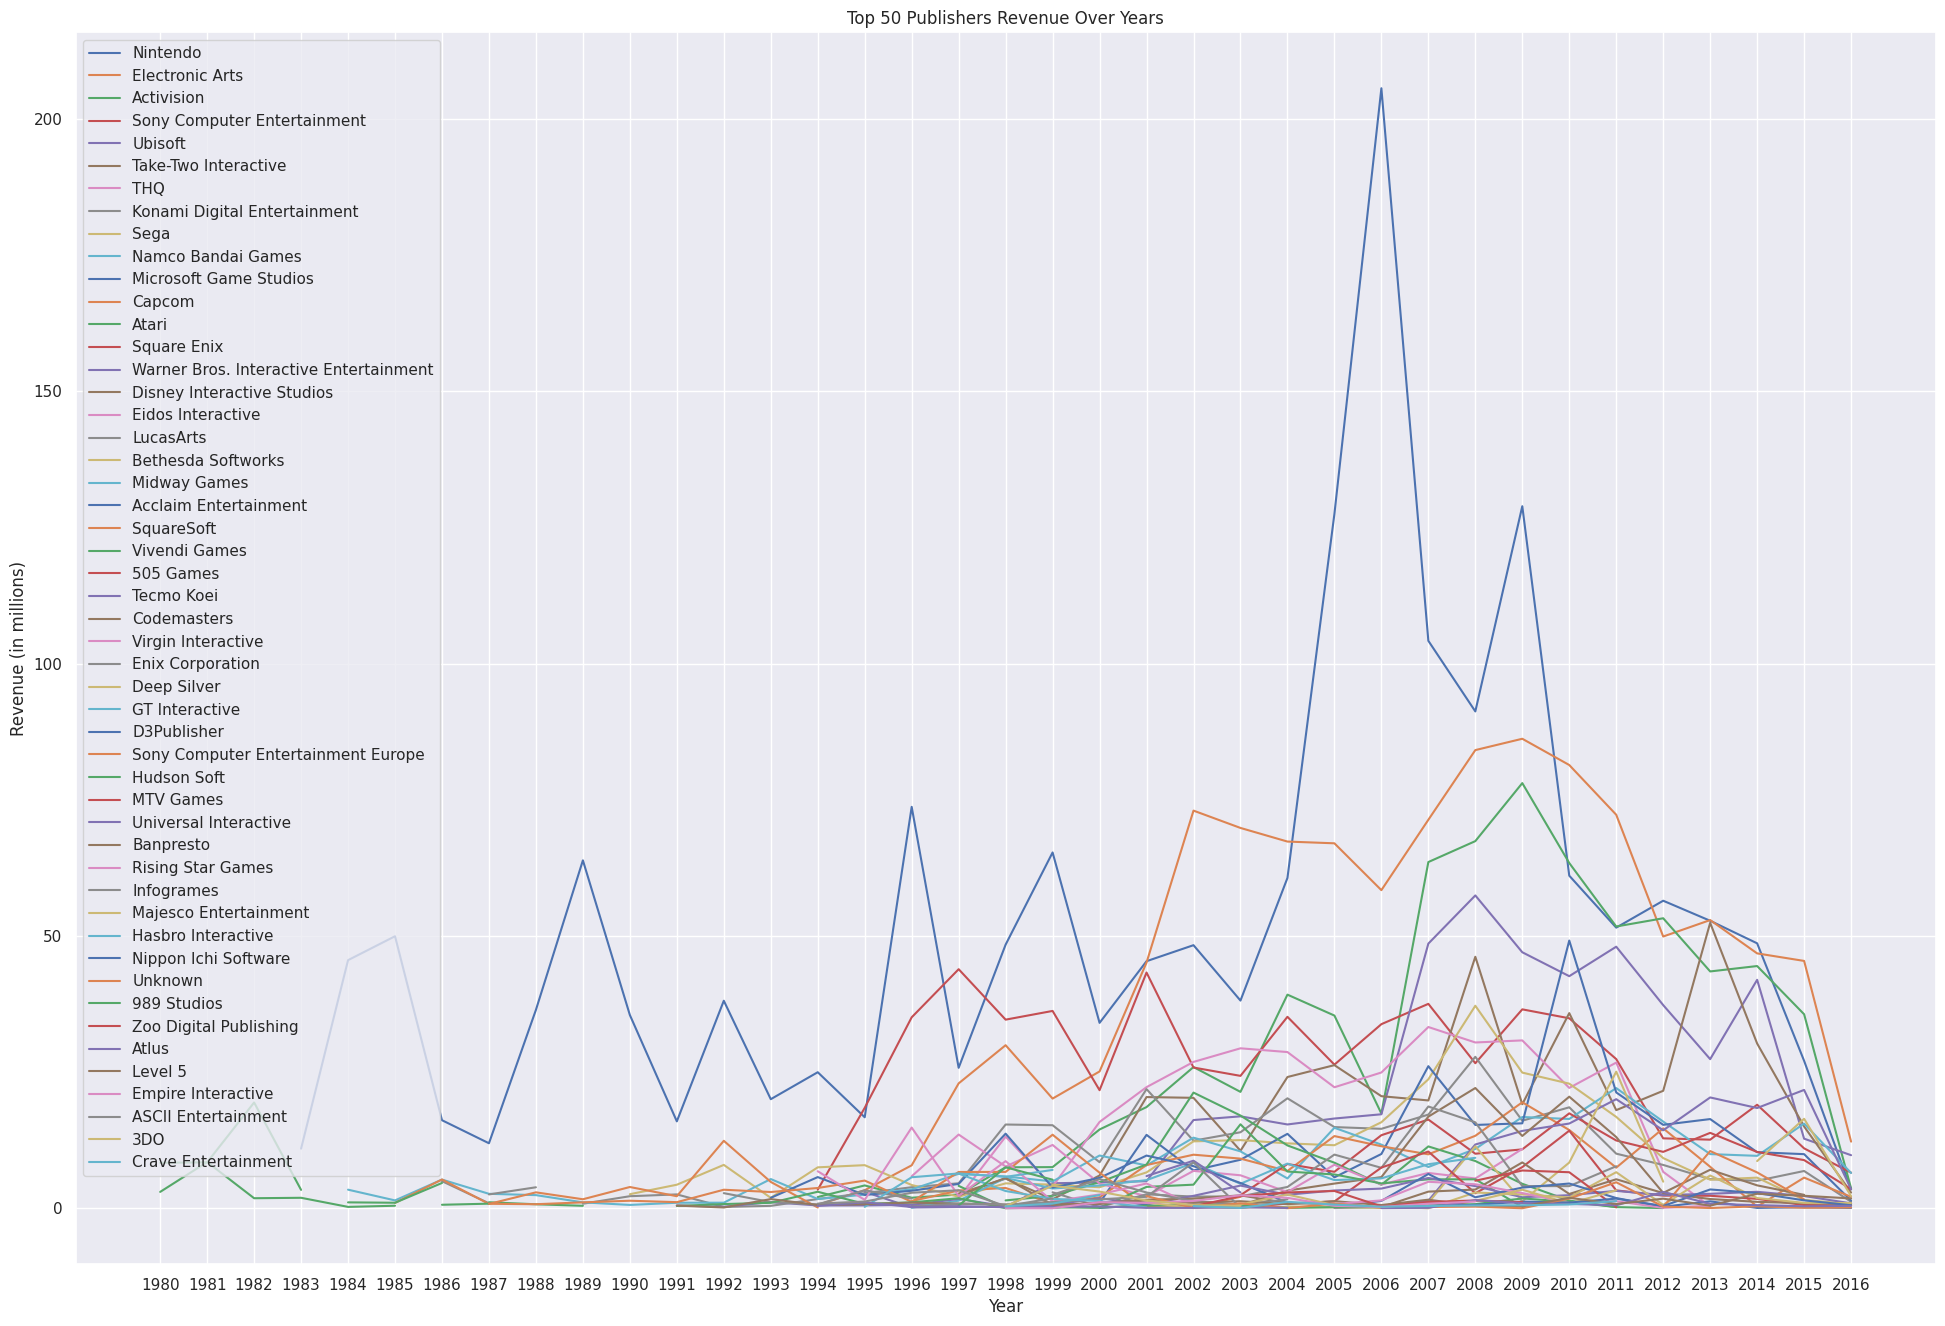

In [24]:
# Pivot the data for easy plotting
pivot_data = yearly_top_50_data.unstack(level=0)

# Plotting
plt.figure(figsize=(24, 16))
for publisher in top_50_global_publishers:
    plt.plot(pivot_data.index, pivot_data[publisher], label=publisher)

plt.title('Top 50 Publishers Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(pivot_data.index)
plt.show()


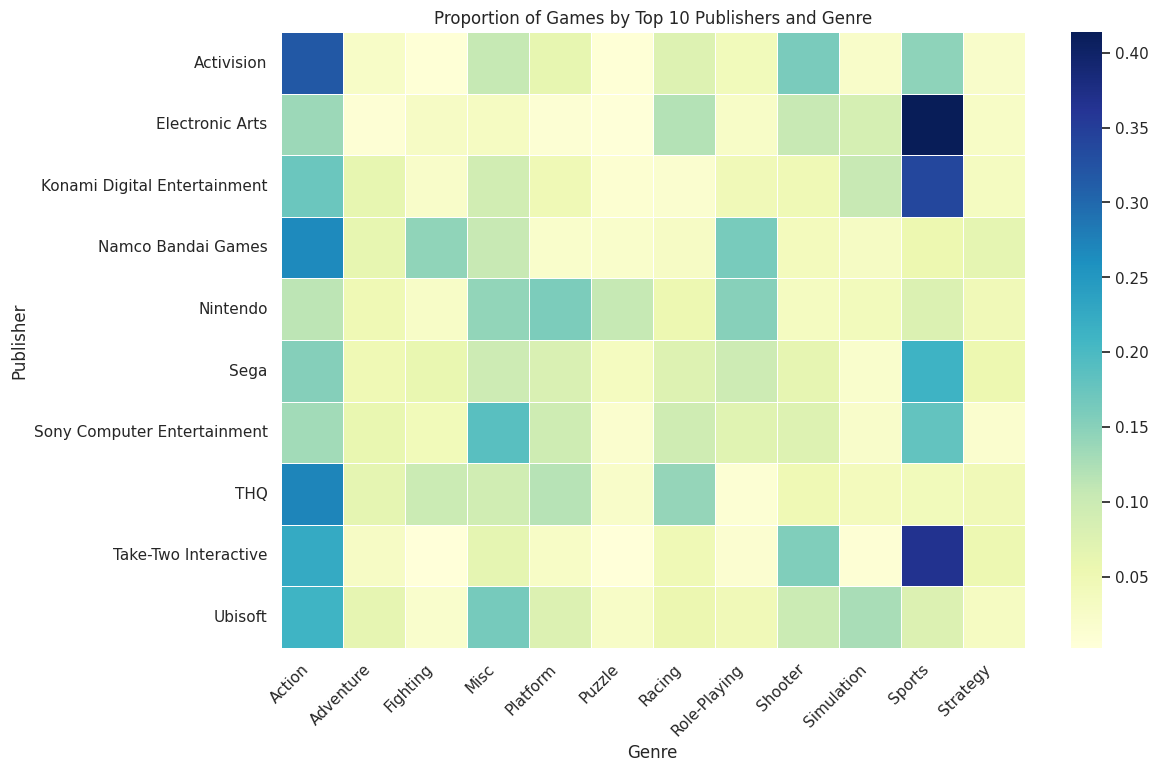

In [26]:
# Calculate total sales by publisher
publisher_sales = vgresult.groupby('Publisher')['Global_Sales'].sum()

# Get the top 10 publishers based on total sales
top_10_publishers = publisher_sales.nlargest(10).index

# Filter the data to include only the top 10 publishers
vgresult_top_10 = vgresult[vgresult['Publisher'].isin(top_10_publishers)]

# Group the filtered data by both 'Publisher' and 'Genre' and count the number of games in each group
publisher_genre_counts = vgresult_top_10.groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
publisher_genre_proportions = publisher_genre_counts.div(publisher_genre_counts.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(publisher_genre_proportions, cmap='YlGnBu', linewidths=0.5)
plt.title('Proportion of Games by Top 10 Publishers and Genre')
plt.xlabel('Genre')
plt.ylabel('Publisher')
plt.xticks(rotation=45, ha='right')
plt.show()


In [27]:
# Calculate total sales by publisher
publisher_sales = vgresult.groupby('Publisher')['Global_Sales'].sum()

# Get the top 50 publishers based on total sales
top_50_publishers = publisher_sales.nlargest(50).index

# Filter the data to include only the top 50 publishers
vgresult_top_50 = vgresult[vgresult['Publisher'].isin(top_50_publishers)]

# Group the filtered data by both 'Publisher' and 'Genre' and count the number of games in each group
publisher_genre_counts = vgresult_top_50.groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
publisher_genre_proportions = publisher_genre_counts.div(publisher_genre_counts.sum(axis=1), axis=0)

# Find the publisher with the highest proportion for each genre
dominant_publisher_per_genre = publisher_genre_proportions.idxmax()

# Display the results
print("Publisher with most number of games per Genre:")
print(dominant_publisher_per_genre)

#the top publishers here are very diff from the top 10 earning so quality > quantity

Publisher with most number of games per Genre:
Genre
Action          Warner Bros. Interactive Entertainment
Adventure           Sony Computer Entertainment Europe
Fighting                            Virgin Interactive
Misc                                         MTV Games
Platform                         Universal Interactive
Puzzle                              Empire Interactive
Racing                                     Codemasters
Role-Playing                          Enix Corporation
Shooter                             Bethesda Softworks
Simulation                                   505 Games
Sports                                     989 Studios
Strategy                                     Banpresto
dtype: object


Finding the relationship between each variable and global sale

In [28]:
categorical_sale = pd.DataFrame(vgresult[[ "Platform","Year","Genre","Publisher","Global_Sales"]])
categorical_sale.head()

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37


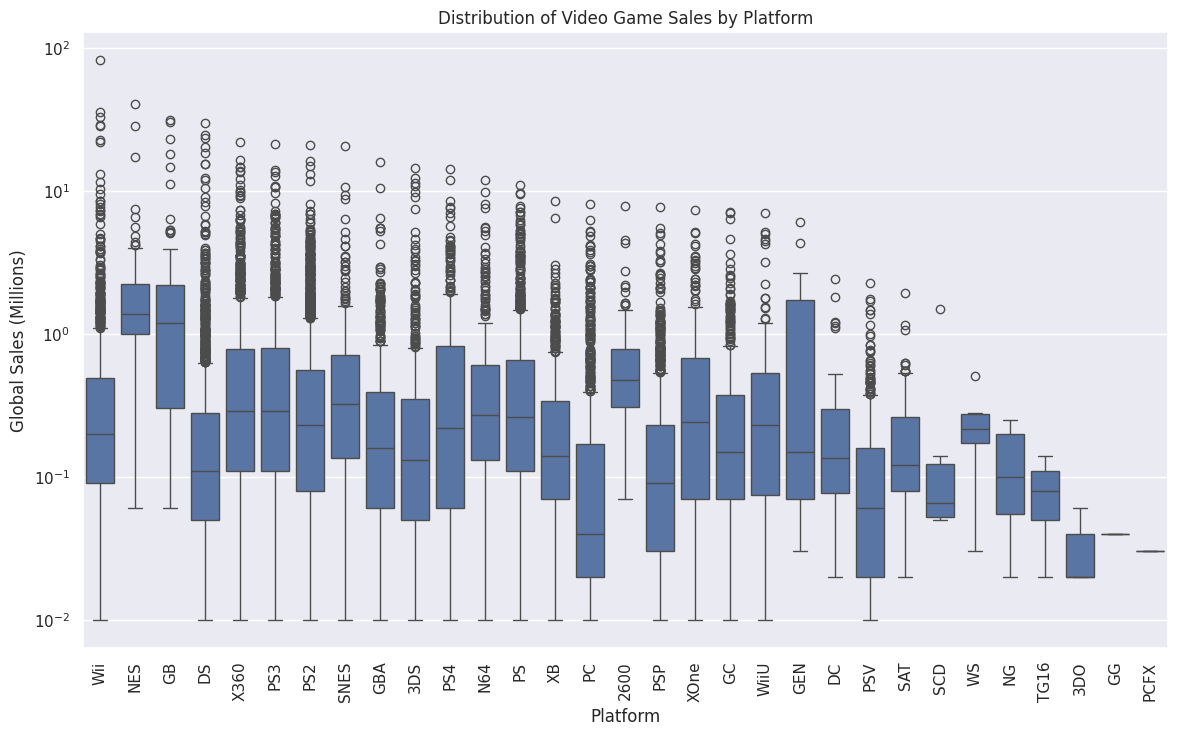

In [29]:
plt.figure(figsize=(14, 8))
sb.boxplot(data=categorical_sale, x='Platform', y='Global_Sales')
plt.xticks(rotation=90)  # Rotate the platform names for better readability
plt.title('Distribution of Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.yscale('log')  # Use log scale due to wide range of sales numbers
plt.show()

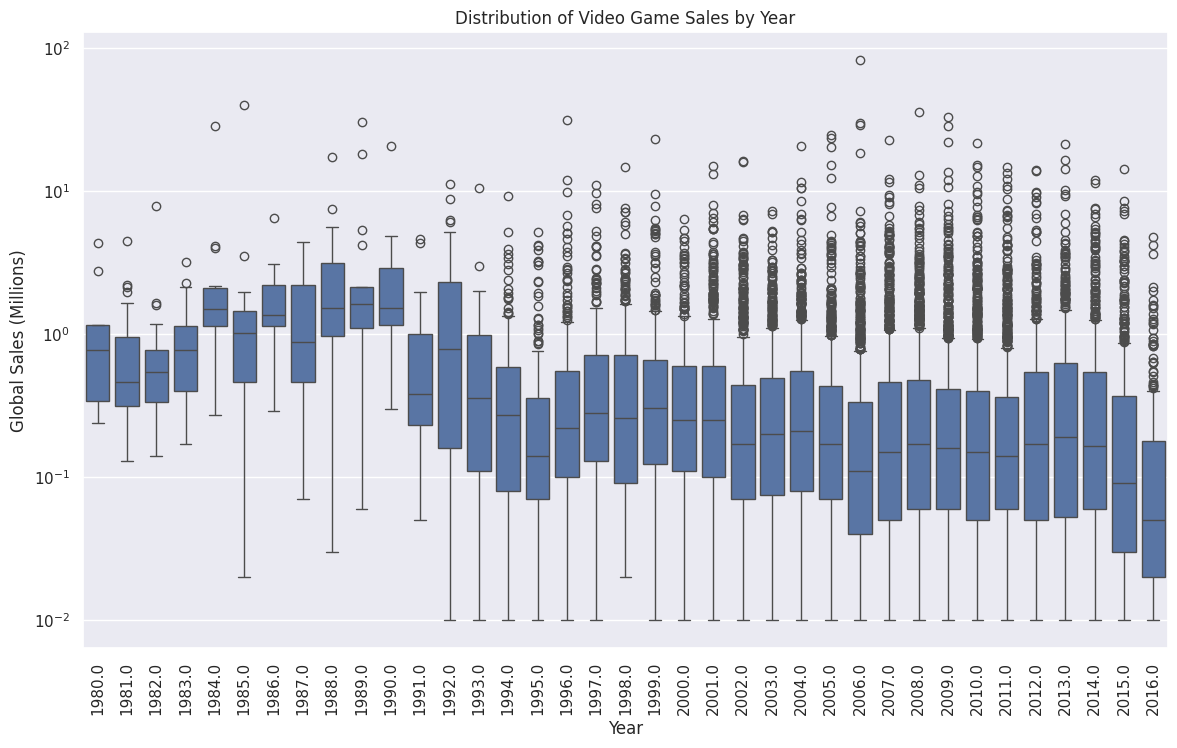

In [30]:
plt.figure(figsize=(14, 8))
sb.boxplot(data=categorical_sale, x='Year', y='Global_Sales')
plt.xticks(rotation=90)  # Rotate the platform names for better readability
plt.title('Distribution of Video Game Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.yscale('log')  # Use log scale due to wide range of sales numbers
plt.show()

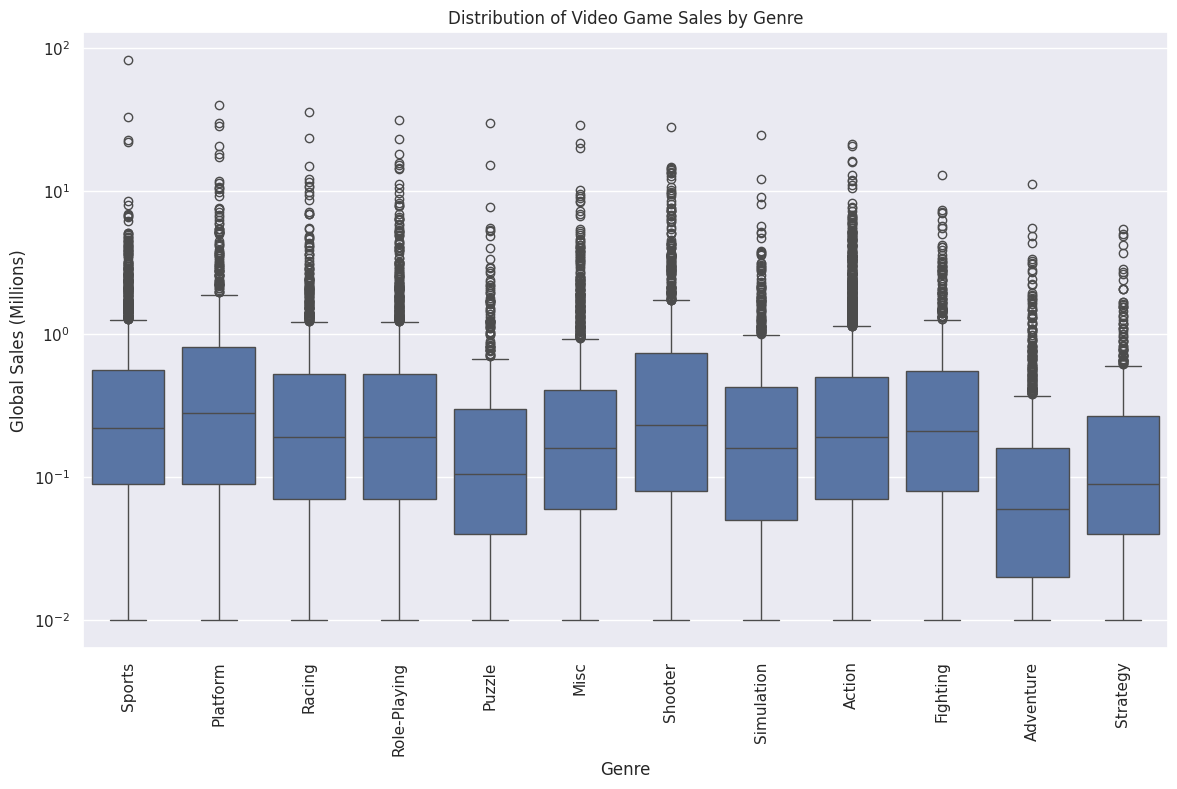

In [31]:
plt.figure(figsize=(14, 8))
sb.boxplot(data=categorical_sale, x='Genre', y='Global_Sales')
plt.xticks(rotation=90)  # Rotate the platform names for better readability
plt.title('Distribution of Video Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.yscale('log')  # Use log scale due to wide range of sales numbers
plt.show()

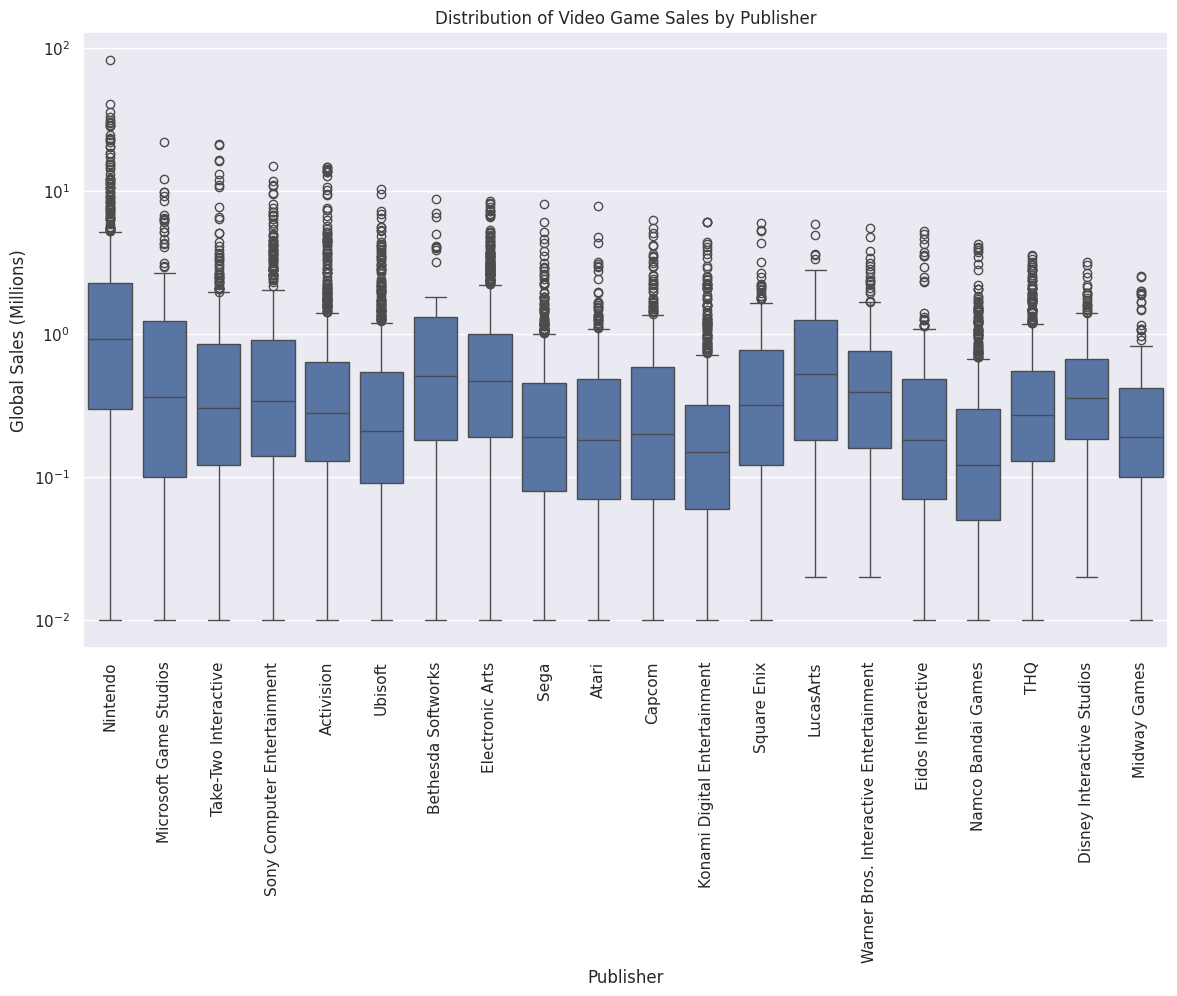

In [32]:
# Filter categorical sale to include only the top 20 publishers
publisher_sales = categorical_sale.groupby('Publisher')['Global_Sales'].sum()
top_20_publishers = publisher_sales.nlargest(20).index
categorical_sale_top_20_publishers = categorical_sale[categorical_sale['Publisher'].isin(top_20_publishers)]

plt.figure(figsize=(14, 8))
sb.boxplot(data=categorical_sale_top_20_publishers, x='Publisher', y='Global_Sales')
plt.xticks(rotation=90)  # Rotate the publisher names for better readability
plt.title('Distribution of Video Game Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.yscale('log')  # Use log scale due to wide range of sales numbers
plt.show()


In [33]:
platform_sales_stats = categorical_sale.groupby('Platform')['Global_Sales'].agg(['median', 'mean'])
year_sales_stats = categorical_sale.groupby('Year')['Global_Sales'].agg(['median', 'mean'])
genre_sales_stats = categorical_sale.groupby('Genre')['Global_Sales'].agg(['median', 'mean'])
publisher_sales_stats = categorical_sale_top_20_publishers.groupby('Publisher')['Global_Sales'].agg(['mean', 'median'])

# Print the median and mean sales for each platform
print(platform_sales_stats)
print(year_sales_stats)
print(genre_sales_stats)
print(publisher_sales_stats)

          median      mean
Platform                  
2600       0.475  0.746293
3DO        0.020  0.033333
3DS        0.130  0.493527
DC         0.135  0.307115
DS         0.110  0.384329
GB         1.180  2.622887
GBA        0.160  0.388830
GC         0.150  0.363727
GEN        0.150  1.050370
GG         0.040  0.040000
N64        0.270  0.690538
NES        1.375  2.561939
NG         0.100  0.120000
PC         0.040  0.271535
PCFX       0.030  0.030000
PS         0.260  0.611766
PS2        0.230  0.579906
PS3        0.290  0.728029
PS4        0.220  0.830060
PSP        0.090  0.243701
PSV        0.060  0.150931
SAT        0.120  0.194162
SCD        0.065  0.311667
SNES       0.320  0.837029
TG16       0.080  0.080000
WS         0.215  0.236667
Wii        0.200  0.705279
WiiU       0.230  0.572448
X360       0.290  0.785737
XB         0.140  0.313935
XOne       0.240  0.662254
        median      mean
Year                    
1980.0   0.770  1.264444
1981.0   0.465  0.777609
1982.0   

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62586f1a-5f5e-459f-afe7-2b73319ce813' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>